In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score, accuracy_score

data = pd.read_csv('tourist-departures.csv')
data

,Entity,Code,Year,Outbound departures (tourists) per 1000 people,"GDP per capita, PPP (constant 2017 international $)",Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,Asia
1,Afghanistan,AFG,2002,NaN,1280.4631,NaN
2,Afghanistan,AFG,2003,NaN,1292.3335,NaN
3,Afghanistan,AFG,2004,NaN,1260.0605,NaN
4,Afghanistan,AFG,2005,NaN,1352.3207,NaN
...,...,...,...,...,...,...
5490,Zimbabwe,ZWE,2016,220.858300,2286.6235,NaN
5491,Zimbabwe,ZWE,2017,187.647000,2331.7808,NaN
5492,Zimbabwe,ZWE,2018,152.004460,2399.6216,NaN
5493,Zimbabwe,ZWE,2019,213.291050,2203.3967,NaN


# DataSplit pada DataSet

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [3]:
X = data.iloc[:,:-1] 
y = data.iloc[:,-1]

Ubah variable target menjadi 0 dan 1

In [4]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Memisah kolom numerik dan kategorial

In [5]:
numeric_cols = [col for col in X_train.columns if X_train[col].dtype != 'object']
categorical_cols = [col for col in X_train.columns if X_train[col].dtype == 'object']

Menggunakan OneHotEncoder untuk kolom kategorial

In [6]:
from sklearn.preprocessing import OneHotEncoder

In [7]:
encoder = OneHotEncoder(sparse_output = False, handle_unknown = 'ignore')

In [8]:
X_train_encoded = encoder.fit_transform(X_train[categorical_cols])
X_test_encoded = encoder.transform(X_test[categorical_cols])

Konversi data set menjadi 'float32'

In [9]:
X_train[numeric_cols] = X_train[numeric_cols].astype('float32')
X_test[numeric_cols] = X_test[numeric_cols].astype('float32')
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

# Model Sequential

In [10]:
import tensorflow as tf
from tensorflow import keras

In [11]:
model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation='relu', input_shape = (None, 101)),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, None, 64)          6528      
                                                                 
 dense_1 (Dense)             (None, None, 32)          2080      
                                                                 
 dense_2 (Dense)             (None, None, 1)           33        
                                                                 
Total params: 8641 (33.75 KB)
Trainable params: 8641 (33.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [15]:
input_dim = X_train_encoded.shape[1]  
model = Sequential()
model.add(Dense(128, input_dim=input_dim, activation='relu'))

model.add(Dense(1, activation='sigmoid'))  

In [16]:
model.compile(optimizer = 'sgd', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Menggunakan Callsback

In [19]:
class MyCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') > 0.93 and logs.get('val_accuracy') > 0.93):
            self.model.stop_training = True

# Melatih model

In [20]:
call = MyCallback()
history = model.fit(
    X_train_encoded,
    y_train,
    epochs=10,
    batch_size = 32,
    validation_data=(X_test_encoded, y_test),
    callbacks=[call]
)

Epoch 1/10
138/138 [==============================] - 1s 5ms/step - loss: nan - accuracy: 9.0992e-04 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 2/10
138/138 [==============================] - 1s 5ms/step - loss: nan - accuracy: 0.0071 - val_loss: nan - val_accuracy: 0.0109
Epoch 3/10
138/138 [==============================] - 1s 5ms/step - loss: nan - accuracy: 0.0111 - val_loss: nan - val_accuracy: 0.0109
Epoch 4/10
138/138 [==============================] - 1s 5ms/step - loss: nan - accuracy: 0.0111 - val_loss: nan - val_accuracy: 0.0109
Epoch 5/10
138/138 [==============================] - 1s 5ms/step - loss: nan - accuracy: 0.0111 - val_loss: nan - val_accuracy: 0.0109
Epoch 6/10
138/138 [==============================] - 1s 5ms/step - loss: nan - accuracy: 0.0111 - val_loss: nan - val_accuracy: 0.0109
Epoch 7/10
138/138 [==============================] - 1s 5ms/step - loss: nan - accuracy: 0.0111 - val_loss: nan - val_accuracy: 0.0109
Epoch 8/10
138/138 [====================

# Evaluasi Model

In [22]:
score = model.evaluate(X_test_encoded, y_test, verbose=1)
print('Test loss     :', score[0])
print('Test accuracy :', score[1])

35/35 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.0109
Test loss     : nan
Test accuracy : 0.010919017717242241


# Grafik perbandingan accuracy dan loss dari train dan test

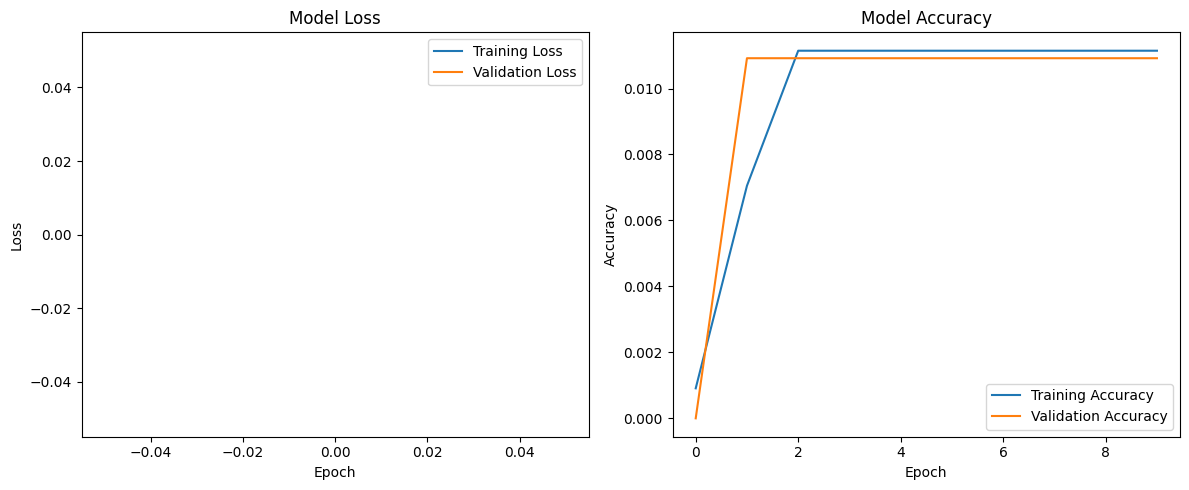

In [23]:
from matplotlib import pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

plt.tight_layout()
plt.show()